In [7]:
from argparse import ArgumentParser

from keras.utils import to_categorical
from utility import globalvars
from ggplot import *

import pandas as pd
import numpy as np

try:
    import cPickle as pickle
except ImportError:
    import pickle

In [8]:
dataset = "berlin-012345"
dataset_path = dataset + "/"
print("Loading data from " + dataset + " data set...")
ds = pickle.load(open(dataset_path + dataset + '_db.p', 'rb'))
nb_samples = len(ds.targets)
print("Number of samples: " + str(nb_samples))
globalvars.nb_classes = len(np.unique(ds.targets))
nb_classes = globalvars.nb_classes
print("Number of classes: " + str(globalvars.nb_classes))
i = 0
for name_emo in ds.name_emotions:
    print(str(i) + " -> " + name_emo)
    i += 1

Loading data from berlin-012345 data set...
Number of samples: 375
Number of classes: 5
0 -> anger
1 -> disgust
2 -> fear
3 -> happiness
4 -> sadness
5 -> surprise


In [9]:
print("Loading features from file...")
features = pickle.load(open(dataset_path + dataset + '_features.p', 'rb'))
features_sequence = pickle.load(open(dataset_path + dataset + '_features_sequence.p', 'rb'))

lable_features = ['zcr', 'energy', 'energy_entropy', 'spectral_centroid', 'spectral_spread', 'spectral_entropy',
                  'spectral_flux', 'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6',
                  'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'chroma_1', 'chroma_2',
                  'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10',
                  'chroma_11', 'chroma_12', 'chroma_std', 'harmonic_ratio', 'pitch']

Loading features from file...


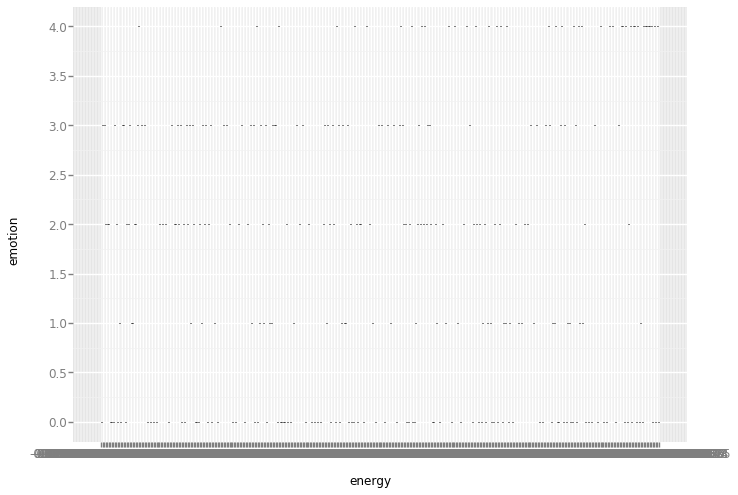

In [10]:
    mean_features = []
    for single_audio in features:
        mean_features.append(np.apply_along_axis(np.mean, 0, single_audio))

    df_features = pd.DataFrame.from_records(data=mean_features, columns=lable_features)
    df_emotions = pd.DataFrame(data=ds.targets, columns=["emotion"])
    df = pd.concat([df_features, df_emotions], axis=1)

    p = ggplot(aes(x="energy", y="emotion"), data=df)
    p + geom_violin()
    p.show()

In [ ]:
    mean_features = []
    for single_audio in features:
        mean_features.append(np.apply_along_axis(np.mean, 0, single_audio))

    df_features = pd.DataFrame.from_records(data=mean_features, columns=lable_features)
    df_emotions = pd.DataFrame(data=ds.targets, columns=["emotion"])
    df = pd.concat([df_features, df_emotions], axis=1)

    p = ggplot(aes(x="energy", y="emotion"), data=df)
    p + geom_violin()
    p.show()